# Proximal Policy Optimization (PPO) with TensorFlow

Understanding PPO reinforcement learning algorithm and implementing it with TensorFlow 2.x

![image](https://miro.medium.com/max/1400/1*XreRjuz6MmATuoRvmprsdA.webp)

The source of the notes come from this [blog](https://towardsdatascience.com/proximal-policy-optimization-ppo-with-tensorflow-2-x-89c9430ecc26).

In this article, we will try to understand Open-AI’s Proximal Policy Optimization algorithm for reinforcement learning. After some basic theory, we will be implementing PPO with TensorFlow 2.x. Before you read further, I would recommend you take a look at the Actor-Critic method from [here](https://towardsdatascience.com/actor-critic-with-tensorflow-2-x-part-2of-2-b8ceb7e059db), as we will be modifying the code of that article for PPO.



## Why PPO?

1. *Unstable Policy Update*: In Many Policy Gradient Methods, policy updates are unstable because of larger step size, which leads to bad policy updates and when this new bad policy is used for learning then it leads to even worse policy. And if steps are small then it leads to slower learning.

2. *Data Inefficiency*: Many learning methods learn from current experience and discard the experiences after gradient updates. This makes the learning process slow as a neural net takes lots of data to learn.

PPO comes handy to overcome the above issues.

### Core Idea Behind PPO

In earlier Policy gradient methods, the objective function was something like $\hat{\mathbb{E}}[\log \pi_{\theta}(a_t/s_t) \cdot \hat{A}_t]$. But now instead of the log of current policy, we will be taking the ratio of current policy and old policy.

$$\hat{\mathbb{E}} \big[\frac{\pi_{\theta}(a_t | s_t)}{\pi_{\theta_{\text{old}}}(a_t|s_t)} \hat{A}_t \big] = \hat{\mathbb{E}} \big[r_t(\theta) \hat{A}_t \big]$$

Equation comes from this [paper](https://arxiv.org/abs/1707.06347).

We will be also clipping the ratio and will the minimum of the two i.e b/w clipped and unclipped.

$$L^{\text{CLIP}(\theta)} = \hat{\mathbb{E}} \big[\min(r_t(\theta) \hat{A}_t, \text{clip}(r_t(\theta), 1-\epsilon, 1+\epsilon) \hat{A}_t\big]$$

This clipped objective will restrict large policy updates as shown below.

![image](https://miro.medium.com/max/1400/1*VN01Obh5VyJ6QuA0qfyq6w.webp)

Photo from this [paper](https://arxiv.org/abs/1707.06347)


## Algorithm Steps

1. Play game for n steps and store state, action probability, rewards, done variables.
2. Apply the Generalized Advantage Estimation method on the above experience. We will see this in the coding section.
3. Train neural networks for some epochs by calculating their respective loss.
4. Test this trained model for “m” episodes.
5. If the average reward of test episodes is larger than the target reward set by you then stop otherwise repeat from step one.

## Code

1. After importing the required libraries and initializing our environment, we define our neural networks and are similar to that of the Actor-Critic article.
2. The Actor-network takes the current state as input and outputs probability for each action.
3. The Critic network outputs the value of a state.

```py
class critic():
    # here is a neural network with dense layers

class actor():
    # here is another neural network with dense layers
```

## Action Selection

1. We define our agent class and initialize optimizer and learning rate.
2. We also define a clip_pram variable which will be used in the actor loss function.
3. For action selection, we will be using the TensorFlow probabilities library, which takes probabilities as input and convert them into distribution.
4. Then, we use the distribution for action selection.

```py
class agent()
    def __init__(self):
        # define optimizer
        # define actor()
        # define critic()
    
    def act(self, state):
        # define what the actor does
    
    def actor_loss(self, prob, action, td):
        # define the formuls
        # and compute the loss for actor
        # loss is defined according to PPO formula
    
    def learn():
        # use gradient tape to update gradient
        # according to PPO loss function
```

## Test Model Knolwedge

This function will be used to test our agent’s knowledge and returns the total reward for one episode.

```py
def test_reward(env):
    # there we have a while-loop to update reward
```

## Training Loop

1. We will loop for “steps” time i.e we will collect experience for “steps” time.
2. The next loop is for the number of times agent interacts with environments and we store experiences in different lists.
3. After the above loop, we calculate and add the value of the state next to the last state for calculations in the Generalized Advantage Estimation method.
4. Then, we process all the lists in the Generalized Advantage Estimation method to get returns, advantage.
5. Next, we train our networks for 10 epochs.
6. After training, we will test our agent on the test environment for five episodes.
7. If the average reward of test episodes is larger than the target reward set by you then stop otherwise repeat from step one.

```py
# define params
for s in range(steps):
    for s in range(steps):
        # define params for inner loop
        # compute actions, probabilities, values
        reward.append()
        actions.append()
        probs.append()
        values.append()
    for epochs in range(10):
        # run 
        agent().learn()
        # which use gradient tape to update gradient
    
    # clean up
    # and print results
    # and save

```

## Code Starts from Here

### Library

In [16]:
import numpy as np
import tensorflow as tf 
import gym
import tensorflow_probability as tfp
import tensorflow.keras.losses as kls

### Installation

Please install the following.

In [3]:
pip install box2d-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.5/374.5 KB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.8-cp38-cp38-linux_x86_64.whl size=2835001 sha256=1aac00046f2e9a376195a72d2aa31ee39ec050a0df36c3e51c1d5107bf61c9d0
  Stored in directory: /root/.cache/pip/wheels/cc/4f/d6/44eb0a9e6fea384e58f19cb0c4125e46a23af2b33fe3a7e81c
Successfully built box2d-py


In [4]:
pip install gym[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pygame-2.1.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp38-cp38-linux_x86_64.whl size=2834814 sha256=130ff3883c95bb2e24e10d15454a08019dc496fcd2aa4e4f5e069e4a2325d292
  Stored in directory: /root/.cache/pip/wheels/8b/95/16/1dc99ff9a3f316ff245fdb5c9086cd13c35dad630809909075
Successfully built box2d-py
  Attempting uninstall: box2d-py
    Found existing installation: box2d-py 2.3.8
    Uninstalling box2d-py-2.3.8:
      Successfully uninstalled box2d-py-2.3.8


### Initiate Environment

We use the `Cart Pole` environment from [gym](https://www.gymlibrary.dev/environments/classic_control/cart_pole/).

In [17]:
env = gym.make("CartPole-v0")
low = env.observation_space.low
high = env.observation_space.high

/usr/local/lib/python3.8/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


### Define Class Object: `critic`

In [18]:
class critic(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.d1 = tf.keras.layers.Dense(128,activation='relu')
        self.v = tf.keras.layers.Dense(1, activation = None)

    def call(self, input_data):
        x = self.d1(input_data)
        v = self.v(x)
        return v


class actor(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.d1 = tf.keras.layers.Dense(128,activation='relu')
        self.a = tf.keras.layers.Dense(2,activation='softmax')

    def call(self, input_data):
        x = self.d1(input_data)
        a = self.a(x)
        return a

### Define Class Object: `agent`

In [19]:
class agent():
    def __init__(self, gamma = 0.99):
        self.gamma = gamma
        # self.a_opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
        # self.c_opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
        self.a_opt = tf.keras.optimizers.Adam(learning_rate=7e-3)
        self.c_opt = tf.keras.optimizers.Adam(learning_rate=7e-3)
        self.actor = actor()
        self.critic = critic()
        self.clip_pram = 0.2


    def act(self,state):
        prob = self.actor(np.array([state]))
        prob = prob.numpy()
        dist = tfp.distributions.Categorical(probs=prob, dtype=tf.float32)
        action = dist.sample()
        return int(action.numpy()[0])


    def actor_loss(self, probs, actions, adv, old_probs, closs):

        probability = probs      
        entropy = tf.reduce_mean(tf.math.negative(tf.math.multiply(probability,tf.math.log(probability))))
        #print(probability)
        #print(entropy)
        sur1 = []
        sur2 = []

        for pb, t, op,a  in zip(probability, adv, old_probs, actions):
            t =  tf.constant(t)
            #op =  tf.constant(op)
            #print(f"t{t}")
            #ratio = tf.math.exp(tf.math.log(pb + 1e-10) - tf.math.log(op + 1e-10))
            ratio = tf.math.divide(pb[a],op[a])
            #print(f"ratio{ratio}")
            s1 = tf.math.multiply(ratio,t)
            #print(f"s1{s1}")
            s2 =  tf.math.multiply(tf.clip_by_value(ratio, 1.0 - self.clip_pram, 1.0 + self.clip_pram),t)
            #print(f"s2{s2}")
            sur1.append(s1)
            sur2.append(s2)

        sr1 = tf.stack(sur1)
        sr2 = tf.stack(sur2)
        
        #closs = tf.reduce_mean(tf.math.square(td))
        loss = tf.math.negative(tf.reduce_mean(tf.math.minimum(sr1, sr2)) - closs + 0.001 * entropy)
        #print(loss)
        return loss

    def learn(self, states, actions,  adv , old_probs, discnt_rewards):
        discnt_rewards = tf.reshape(discnt_rewards, (len(discnt_rewards),))
        adv = tf.reshape(adv, (len(adv),))

        old_p = old_probs
        old_p = tf.reshape(old_p, (len(old_p),2))

        with tf.GradientTape() as tape1, tf.GradientTape() as tape2:
            p = self.actor(states, training=True)
            v =  self.critic(states,training=True)
            v = tf.reshape(v, (len(v),))
            td = tf.math.subtract(discnt_rewards, v)
            c_loss = 0.5 * kls.mean_squared_error(discnt_rewards, v)
            a_loss = self.actor_loss(p, actions, adv, old_probs, c_loss)

        grads1 = tape1.gradient(a_loss, self.actor.trainable_variables)
        grads2 = tape2.gradient(c_loss, self.critic.trainable_variables)
        self.a_opt.apply_gradients(zip(grads1, self.actor.trainable_variables))
        self.c_opt.apply_gradients(zip(grads2, self.critic.trainable_variables))

        return a_loss, c_loss

In [20]:
def test_reward(env):
    total_reward = 0
    state = env.reset()
    done = False
    while not done:
        action = np.argmax(agentoo7.actor(np.array([state])).numpy())
        next_state, reward, done, _ = env.step(action)
        state = next_state
        total_reward += reward

    return total_reward

In [21]:
def preprocess1(states, actions, rewards, done, values, gamma):
    g = 0
    lmbda = 0.95
    returns = []
    for i in reversed(range(len(rewards))):
        delta = rewards[i] + gamma * values[i + 1] * done[i] - values[i]
        g = delta + gamma * lmbda * dones[i] * g
        returns.append(g + values[i])

    returns.reverse()
    adv = np.array(returns, dtype=np.float32) - values[:-1]
    adv = (adv - np.mean(adv)) / (np.std(adv) + 1e-10)
    states = np.array(states, dtype=np.float32)
    actions = np.array(actions, dtype=np.int32)
    returns = np.array(returns, dtype=np.float32)

    return states, actions, returns, adv    

### Define and Run Training

In [33]:
tf.random.set_seed(2023)
agentoo7 = agent()
steps = 1000000
ep_reward = []
total_avgr = []
target = False 
best_reward = 0
avg_rewards_list = []
for s in range(steps):
    print(f'START: Running step = {s} now =====================================')
    if target == True:
        break

    done = False
    state = env.reset()
    all_aloss = []
    all_closs = []
    rewards = []
    states = []
    actions = []
    probs = []
    dones = []
    values = []
    print("new episod")

    for e in range(128):
        action = agentoo7.act(state)
        value = agentoo7.critic(np.array([state])).numpy()
        next_state, reward, done, _ = env.step(action)
        dones.append(1-done)
        rewards.append(reward)
        states.append(state)
        #actions.append(tf.one_hot(action, 2, dtype=tf.int32).numpy().tolist())
        actions.append(action)
        prob = agentoo7.actor(np.array([state]))
        probs.append(prob[0])
        values.append(value[0][0])
        state = next_state
        if done:
            env.reset()

    value = agentoo7.critic(np.array([state])).numpy()
    values.append(value[0][0])
    np.reshape(probs, (len(probs),2))
    probs = np.stack(probs, axis=0)

    states, actions,returns, adv  = preprocess1(states, actions, rewards, dones, values, 1)

    for epocs in range(10):
        al,cl = agentoo7.learn(states, actions, adv, probs, returns)
        # print(f"al{al}") 
        # print(f"cl{cl}")

    avg_reward = np.mean([test_reward(env) for _ in range(5)])
    print(f"total test reward is {avg_reward}")
    avg_rewards_list.append(avg_reward)
    if avg_reward > best_reward:
        print('best reward=' + str(avg_reward))
        agentoo7.actor.save('model_actor_{}_{}'.format(s, avg_reward), save_format="tf")
        agentoo7.critic.save('model_critic_{}_{}'.format(s, avg_reward), save_format="tf")
        best_reward = avg_reward
    if best_reward == 200:
        target = True

    print(f'===================================== step {s} finished!')
    env.reset()

env.close()

START: Running step = 0 now =====================================
new episod
total test reward is 14.6
best reward=14.6
===================================== step 0 finished!
START: Running step = 1 now =====================================
new episod
total test reward is 86.6
best reward=86.6
===================================== step 1 finished!
START: Running step = 2 now =====================================
new episod
total test reward is 26.6
===================================== step 2 finished!
START: Running step = 3 now =====================================
new episod
total test reward is 52.6
===================================== step 3 finished!
START: Running step = 4 now =====================================
new episod
total test reward is 49.6
===================================== step 4 finished!
START: Running step = 5 now =====================================
new episod
total test reward is 159.6
best reward=159.6
===================================== step 5 finished!

In [29]:
import matplotlib.pyplot as plt

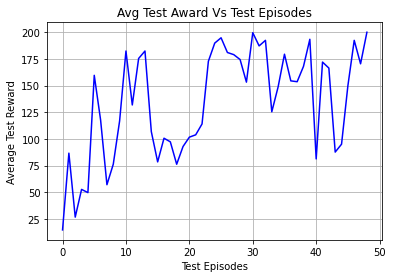

In [35]:
ep = [i  for i in range(len(avg_rewards_list))]
plt.plot( range(len(avg_rewards_list)),avg_rewards_list,'b')
plt.title("Avg Test Award Vs Test Episodes")
plt.xlabel("Test Episodes")
plt.ylabel("Average Test Reward")
plt.grid(True)
plt.show()